# The London Boroughs with the Biggest House Price Increase

When making financial plans, such as buying a house, your calculations can include what you expect the house to be worth in the future. So when people are thinking about where to buy house, they will pay more attention to the areas where housing prices have risen more, based on appreciation.

There are 32 boroughs within Greater London [(here's some info for London boroughs)](https://en.wikipedia.org/wiki/London_boroughs). All the boroughs experienced a house-price increase during the past two decades. Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

This project aims to find out: **which boroughs of London have seen the most significant increase in housing prices, on average, over the last two decades?**

## Sourcing and Loading 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data
* The data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 
* The [dataset](https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls) we're interested in contains the average prices of the houses, and is on a particular sheet of the Excel file. 

In [2]:
# Make a variable called url_LondonHousePrices, and assign it the data link
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# put the data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price')

## Cleaning, Transforming, and Visualizing

### Exploring the data

In [3]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            308 non-null    datetime64[ns]
 1   City of London        309 non-null    object        
 2   Barking & Dagenham    309 non-null    object        
 3   Barnet                309 non-null    object        
 4   Bexley                309 non-null    object        
 5   Brent                 309 non-null    object        
 6   Bromley               309 non-null    object        
 7   Camden                309 non-null    object        
 8   Croydon               309 non-null    object        
 9   Ealing                309 non-null    object        
 10  Enfield               309 non-null    object        
 11  Greenwich             309 non-null    object        
 12  Hackney               309 non-null    object        
 13  Hammersmith & Fulham

We see that there are 48 columns, including [32 London boroughs](https://en.wikipedia.org/wiki/List_of_London_boroughs) and some other regions of England. There are also three meaningless columns with 0 non-null data.

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [5]:
properties.tail()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
304,2020-04-01,867841,283139,526553,346840,494455,443482,870627,386738,502107,...,167809,165561,200513,202093,295640,480425,327413,255891,NaN,250874
305,2020-05-01,899831,295744,532503,339408,466574,420036,862209,369791,490596,...,168261,170198,197505,203658,290621,479018,324659,261006,NaN,251973
306,2020-06-01,938833,300595,519064,341611,487237,429366,854786,367831,470321,...,169717,168830,199857,203749,293593,482227,324398,261222,NaN,252432
307,2020-07-01,852151,304223,524400,344964,481094,434112,804558,374825,475064,...,171298,169835,201191,204730,294161,485010,327057,264824,NaN,254310
308,2020-08-01,814665,302395,522846,350938,487949,435535,812080,376180,487322,...,173617,170025,202345,204886,296411,489159,332147,264886,NaN,256109


The time span of the monthly-undated data is from 1995-01-01 to 2020-08-01. And we noticed that the first row is the ID of corresponding areas.

### Cleaning the data
#### Part 1

We will get rid of all the columns which are not related to our target, 32 London boroughs. 

In [6]:
properties_32 = properties.drop(columns='City of London').iloc[:,:33]

In [7]:
properties_32.shape

(309, 33)

Now, there are 33 columns left, including a datetime column and 32 London borough columns.

#### Part 2

Notice here that the column headings, which are the particular boroughs, is our observation of interest. The first column contains DateTime objects that capture a particular month and year, which is a variable. Most of the other cell-values are the average property values of the borough corresponding to that timestamp.

So we will transpose the data frame, check out what its row indexes are, and reset the index. After that, we will assign the first row values, i.e., the DateTime objects, to the column headings.

In [8]:
# Transpose the dataframe
properties_32T = properties_32.T
properties_32T.head()

,0,1,2,3,4,5,6,7,8,9,...,299,300,301,302,303,304,305,306,307,308
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,73789.5,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


In [9]:
# Reset index as rangeindex
properties_32T = properties_32T.reset_index()

# set the datetime objects as column name
properties_32T.columns = properties_32T.iloc[0]

properties_32T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
3,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
4,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949


We have to drop the first row and rename the first two columns.

In [10]:
# Drop the first row
properties_32T = properties_32T.drop(0)
# Rename the first two columns
properties_32T = properties_32T.rename(columns={'Unnamed: 0':'London_Borough', pd.NaT:'ID'})

Now we can do some inspections on the newest data frame.

In [11]:
properties_32T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,306390,301283,303653,304265,304099,283139,295744,300595,304223,302395
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,522639,519306,518542,519121,527747,526553,532503,519064,524400,522846
3,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,333657,336302,334765,337760,339215,346840,339408,341611,344964,350938
4,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,432188,427126,423161,467145,461398,494455,466574,487237,481094,487949
5,Bromley,E09000006,81671.5,81657.6,81449.3,81124.4,81542.6,82382.8,82898.5,82054.4,...,436080,438682,435532,435704,434625,443482,420036,429366,434112,435535


### Transforming the data

The end goal of data cleaning is to have tidy data. When data is tidy: 
* Each variable has a column.
* Each observation forms a row. 

According to this rule, we will melt the dataframe here. 

In [12]:
clean_properties = pd.melt(properties_32T, id_vars = ['London_Borough','ID'])
clean_properties.head()

,London_Borough,ID,0,value
0,Barking & Dagenham,E09000002,1995-01-01,50460.2
1,Barnet,E09000003,1995-01-01,93284.5
2,Bexley,E09000004,1995-01-01,64958.1
3,Brent,E09000005,1995-01-01,71306.6
4,Bromley,E09000006,1995-01-01,81671.5


In [13]:
# Rename the columns name
clean_properties = clean_properties.rename(columns={0:'Month','value':'Average_Price'})
clean_properties.columns

Index(['London_Borough', 'ID', 'Month', 'Average_Price'], dtype='object')

The columns info above shows that 'Average_Price', which should be floating-point numbers, is 'object'.

In [14]:
# Change data type
clean_properties['Average_Price'] = clean_properties['Average_Price'].astype(float)

In [15]:
clean_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9856 entries, 0 to 9855
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   London_Borough  9856 non-null   object        
 1   ID              9856 non-null   object        
 2   Month           9856 non-null   datetime64[ns]
 3   Average_Price   9856 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 308.1+ KB


As we expected, the 'Average_Price' column has been changed to float type.

Moreover, all the cell-values are non-null, which means we don't need to handle NaN data here. Actually, when we deleted the three meaningless columns at the beginning of data cleaning, we removed all the NaN values in the dataset.

Here, we rename the dataframe from `clean_properties` to `df`.

In [16]:
df = clean_properties
df.head()

,London_Borough,ID,Month,Average_Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.22660
1,Barnet,E09000003,1995-01-01,93284.51832
2,Bexley,E09000004,1995-01-01,64958.09036
3,Brent,E09000005,1995-01-01,71306.56698
4,Bromley,E09000006,1995-01-01,81671.47692


### Visualizing

Before finding out which boroughs experienced higher increase in housing prices, we will inspect London boroughs' general trend.

In order to limit the amount of temporal data-points, we will extract the year from every value in the Month column and calculate the mean housing prices for each year.

In [17]:
df['Year'] = df['Month'].apply(lambda t: t.year)
df.tail()

,London_Borough,ID,Month,Average_Price,Year
9851,Sutton,E09000029,2020-08-01,383366.6747,2020
9852,Tower Hamlets,E09000030,2020-08-01,461691.6301,2020
9853,Waltham Forest,E09000031,2020-08-01,451536.7441,2020
9854,Wandsworth,E09000032,2020-08-01,616711.0200,2020
9855,Westminster,E09000033,2020-08-01,963725.1718,2020


In [18]:
dfg = df.groupby(by=['London_Borough','Year']).mean()
dfg.head()

Average_Price
London_Borough     Year               
Barking & Dagenham 1995   51817.969390
                   1996   51718.192690
                   1997   55974.262309
                   1998   60285.821083
                   1999   65320.934441

To show the trendline of the mean housing prices by different boroughs, we need to unstack and transpose the dataframe.

In [19]:
dfg_U = dfg.unstack()
dfg_U.head()

Average_Price                                              \
Year                        1995          1996           1997           1998   
London_Borough                                                                 
Barking & Dagenham  51817.969390  51718.192690   55974.262309   60285.821083   
Barnet              91792.537433  94000.445448  106883.185546  122359.468033   
Bexley              64291.532845  65490.417234   70789.406603   80632.020822   
Brent               73029.841840  75235.918367   86749.070663  100692.590417   
Bromley             81967.316732  83547.483632   94224.688035  108286.520467   

                                                                 \
Year                         1999           2000           2001   
London_Borough                                                    
Barking & Dagenham   65320.934441   77549.513290   88664.058223   
Barnet              136004.512067  167952.633958  185563.352600   
Bexley               86777.715903  103186.665184  116527.134750   
Brent               112157.469808  140962.500458  157287.404625   
Bromley             120874.179567  147826.713417  162131.842133   

                                                                 ...  \
Year                         2002           2003           2004  ...   
London_Borough                                                   ...   
Barking & Dagenham  112221.912482  142498.927800  158175.982483  ...   
Barnet              220746.059225  251212.927683  271854.112992  ...   
Bexley              136797.964475  164482.038908  179141.168258  ...   
Brent               185898.147992  216501.757008  236023.435958  ...   
Bromley             186646.043217  215992.974433  234462.682883  ...   

                                                                 \
Year                         2011           2012           2013   
London_Borough                                                    
Barking & Dagenham  163465.144225  165863.911600  173733.624933   
Barnet              338978.012525  358627.346250  374770.610075   
Bexley              200672.256583  202546.430625  213470.261625   
Brent               298964.549867  314112.757642  339655.613158   
Bromley             274874.578075  282025.008583  296669.204058   

                                                                 \
Year                         2014           2015           2016   
London_Borough                                                    
Barking & Dagenham  201172.229417  233460.107425  273919.636042   
Barnet              430363.351225  478687.949875  525939.577300   
Bexley              244459.437750  274209.280967  321563.508775   
Brent               394687.482225  440951.665383  489469.418367   
Bromley             347857.248267  385681.450108  428008.119983   

                                                                                
Year                         2017           2018           2019           2020  
London_Borough                                                                  
Barking & Dagenham  287734.717358  295196.673612  298620.203492  299764.135487  
Barnet              538281.017008  533266.534055  519611.265983  523847.033963  
Bexley              335694.468958  342603.605654  336858.000467  341937.547738  
Brent               487703.754375  492845.371253  474513.082183  471126.429438  
Bromley             441218.585283  443409.985635  436459.813675  433549.095712  

[5 rows x 26 columns]

In [20]:
dfg_U_T = dfg_U['Average_Price'].T
dfg_U_T

London_Borough,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,
1995,51817.969390,91792.537433,64291.532845,73029.841840,81967.316732,120367.431783,68923.340845,81218.674792,71984.234888,63389.786578,...,80500.752648,54574.226405,72580.490579,109892.274008,64260.053745,70291.304638,63652.446010,61279.980463,88829.083075,1.336892e+05
1996,51718.192690,94000.445448,65490.417234,75235.918367,83547.483632,133810.487933,69713.920086,83389.914491,74062.012957,65186.781770,...,83999.034578,55747.012583,75358.658939,117307.882658,70117.306851,71651.920030,70094.724437,62177.237897,92270.037989,1.391888e+05
1997,55974.262309,106883.185546,70789.406603,86749.070663,94224.688035,150142.901208,77674.269967,97805.824543,83609.439219,72067.770377,...,95699.209073,60971.380317,83371.972795,136656.271017,79725.850140,81094.119743,85759.562757,68228.785835,108108.356495,1.654476e+05
1998,60285.821083,122359.468033,80632.020822,100692.590417,108286.520467,170688.973933,88143.228830,111343.154650,93030.224322,81532.933366,...,108049.855117,67671.270763,94514.395822,162956.066025,91405.187779,92087.045921,96505.166407,75557.474132,125406.807233,1.905319e+05
1999,65320.934441,136004.512067,86777.715903,112157.469808,120874.179567,191090.697392,97173.322854,126278.342342,101986.993642,90879.131712,...,121901.372575,74525.568363,102940.450633,181772.319642,110267.545583,100869.813722,113035.289367,83821.587936,145339.809767,2.140427e+05
2000,77549.513290,167952.633958,103186.665184,140962.500458,147826.713417,247114.633575,118777.304475,153309.280133,121839.206633,110162.975158,...,151605.431075,92887.329294,124379.142075,227866.164158,142266.729008,125952.047500,141287.778167,103030.676566,184275.835267,2.604922e+05
2001,88664.058223,185563.352600,116527.134750,157287.404625,162131.842133,278594.043717,132509.212908,170190.618025,135713.171425,125820.069908,...,167046.236783,108763.058008,141587.528275,241333.288742,164486.246675,137910.189683,162505.936058,118843.459333,205179.661233,2.961055e+05
2002,112221.912482,220746.059225,136797.964475,185898.147992,186646.043217,314179.507833,157022.768092,198426.774842,159791.067967,147421.507267,...,195714.692417,137455.635925,169368.107767,271689.372425,184684.204442,162526.655508,187288.508558,148137.483958,232805.560442,3.396224e+05
2003,142498.927800,251212.927683,164482.038908,216501.757008,215992.974433,323053.850375,185784.025417,221689.173708,190572.739383,171042.618658,...,220394.193150,168437.517258,203571.971092,294167.994608,199583.838183,187815.760933,207901.578408,175075.867192,253342.476767,3.634660e+05


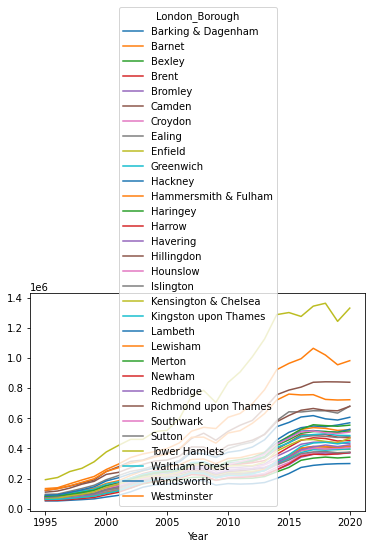

In [21]:
dfg_U_T.plot()

The house prices rose in all boroughs while some of them have a more significant increase. Besides, there are several boroughs whose current prices are obviously higher than other boroughs. We will see if there are an intersection between these boroughs and the boroughs with higher appreciation.

In the next step, we will figure out which boroughs experienced higher increase in the past two decades. 

## Modeling

We will calculate a ratio of housing prices, comparing the average price of a house in 2019 to the price in 1999. Then choose the top 10 as our target. 

In [22]:
appreciation = ((dfg_U_T.loc[2019,:] - dfg_U_T.loc[1999,:]) / dfg_U_T.loc[1999,:]) * 100

In [23]:
rise_top10 = appreciation.sort_values(ascending=False).head(10)

In [24]:
rise_top10 = rise_top10.round(2)
rise_top10

London_Borough
Hackney               426.52
Waltham Forest        413.59
Newham                388.37
Lewisham              383.19
Barking & Dagenham    357.16
Haringey              355.70
Southwark             352.76
Westminster           346.34
Camden                340.49
Lambeth               335.98
dtype: float64

In [25]:
# Change rise_top10 from Series to DataFrame and reset index
df_rise_top10 = rise_top10.to_frame().reset_index()
# Rename column name
df_rise_top10 = df_rise_top10.rename(columns={0:'2019/1999(%)'})

In [26]:
df_rise_top10

,London_Borough,2019/1999(%)
0,Hackney,426.52
1,Waltham Forest,413.59
2,Newham,388.37
3,Lewisham,383.19
4,Barking & Dagenham,357.16
5,Haringey,355.70
6,Southwark,352.76
7,Westminster,346.34
8,Camden,340.49
9,Lambeth,335.98


The dataframe `df_rise_top10` includes the info about the top 10 boroughs with higher appreciation from 1999 to 2019: Hackney, Waltham Forest, Newham, Lewisham, Barking & Dagenham, Haringey, Southwark, Westminster, Camden, and Lambeth.

Let's visualize the house-price increase of these boroughs.

Text(0, 0.5, 'House Price')

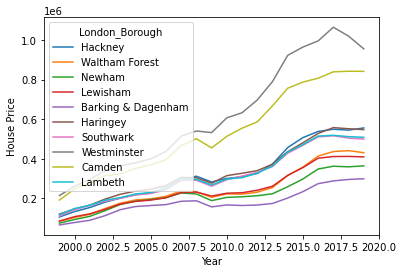

In [27]:
ax = dfg_U_T.loc[1999:2019,rise_top10.index].plot()
ax.set_ylabel('House Price')

As a comparison, we will check which boroughs have higher current housing prices and what's the intersection of the both sets.

We take the average prices of 2019 as current prices. And similarly, we will draw the conclusion from the dataframe `dfg_U_T`, which is unstacked and transposed from the cleaned datafame `df`.

In [28]:
current = dfg_U_T.loc[2019,:]

From the trend line of 32 boroughs' average prices over the past two decades, we can see that there are about six boroughs whose current prices are obviously higher than the others.

In [29]:
current_top6 = current.nlargest(6, 'all')

In [30]:
current_top6.index

Index(['Kensington & Chelsea', 'Westminster', 'Camden', 'Hammersmith & Fulham',
       'Richmond upon Thames', 'Islington'],
      dtype='object', name='London_Borough')

The index of `current_top6` contains the six boroughs with higher current house prices. We will find out the intersection of the two series, `rise_top10` and `current_top6`.

In [31]:
intersection = set(rise_top10.index).intersection(set(current_top6.index))
list(intersection)

['Westminster', 'Camden']

That is to say, among the top 10 boroughs with higher appreciation, Westminster and Camden also have higher current house prices.

## Conclusion

If you bought one or more houses in London boroughs in the past 20 years, you are able to compare how investments have been done by referring to **Top 10 London boroughs with higher appreciation**. 


If you're thinking about where to buy a house now, you can make your decision based on your budget, current prices, and the expected appreciation(according to the performance of last year, last several years, or last two decades, as we did above).
